In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_w=pd.read_csv('Data\weekly_features.csv')
df_m=pd.read_csv('Data\monthly features.csv')

In [2]:
dates = df_w.year*100+df_w.week
df_w['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_w['Date'] = pd.to_datetime(df_w['Date'])
df_w['Date'] = df_w['Date'].dt.strftime('%Y-%m-%d')
mask = (df_w['Date'] >'1990-09-30') & (df_w['Date'] <= '2021-09-30')
df_w = df_w.loc[mask]

In [3]:
df_w

,Unnamed: 0,year,week,tmax,tmin,prcp,Crude Oil WTI,Gold,Oats,Corn,...,Wheat,USD_CAD,USD_CNY,USD_EUR,USD_MXN,USD_PHP Historical Data.csv,SWE,SNOW,SNWD,Date
35,35,1990,40,68.670978,46.875454,36.671429,39.630000,389.980000,121.5500,233.35,...,274.35,1.14888,4.73390,0.72984,2.90400,NaN,23.214286,546.142857,1.739185,1990-10-07
36,36,1990,41,68.902697,44.384425,19.310000,36.830000,369.320000,121.6000,227.95,...,263.35,1.16510,4.73390,0.72244,2.91000,NaN,63.985714,643.142857,3.276722,1990-10-14
37,37,1990,42,65.249601,40.571662,20.657143,31.218000,372.200000,123.2500,230.65,...,263.50,1.16928,4.73390,0.72248,2.91800,NaN,138.714286,154.571429,3.458475,1990-10-21
38,38,1990,43,68.246501,41.789421,7.592857,34.724000,378.140000,120.7500,229.75,...,263.00,1.16536,4.73390,0.72256,2.92000,NaN,278.157143,11632.571429,4.814704,1990-10-28
39,39,1990,44,55.828234,35.737533,31.131429,33.864000,384.900000,120.2000,231.05,...,266.10,1.16534,4.73390,0.71142,2.92200,NaN,532.957143,26965.142857,11.043945,1990-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1673,2021,34,88.749842,66.641080,24.250000,63.946000,1811.020000,512.3000,548.90,...,718.55,1.26262,6.47582,0.84994,20.25184,49.9500,0.000000,0.000000,0.000000,2021-08-29
1674,1674,2021,35,83.961496,62.965989,36.100000,65.760000,1825.020000,504.0000,522.80,...,707.00,1.25816,6.45868,0.84446,20.00916,49.7590,0.000000,0.000000,0.000000,2021-09-05
1675,1675,2021,36,85.035444,60.123095,11.424286,66.686667,1811.116667,490.4375,503.40,...,697.50,1.26448,6.45540,0.84496,19.91200,50.0116,0.000000,0.000000,0.000000,2021-09-12
1676,1676,2021,37,83.397534,60.946201,23.528571,67.418000,1787.540000,526.3500,518.00,...,698.70,1.26848,6.44868,0.84842,19.91342,49.8638,0.000000,0.000000,0.000000,2021-09-19


In [4]:
df_w = df_w.drop(columns=['Unnamed: 0','USD_PHP Historical Data.csv'])

In [5]:
df_w = df_w.fillna(method='ffill')
df_w.isnull().sum()

year             0
week             0
tmax             0
tmin             0
prcp             0
Crude Oil WTI    0
Gold             0
Oats             0
Corn             0
Soybeans         0
Wheat            0
USD_CAD          0
USD_CNY          0
USD_EUR          0
USD_MXN          0
SWE              0
SNOW             0
SNWD             0
Date             0
dtype: int64

<AxesSubplot:>

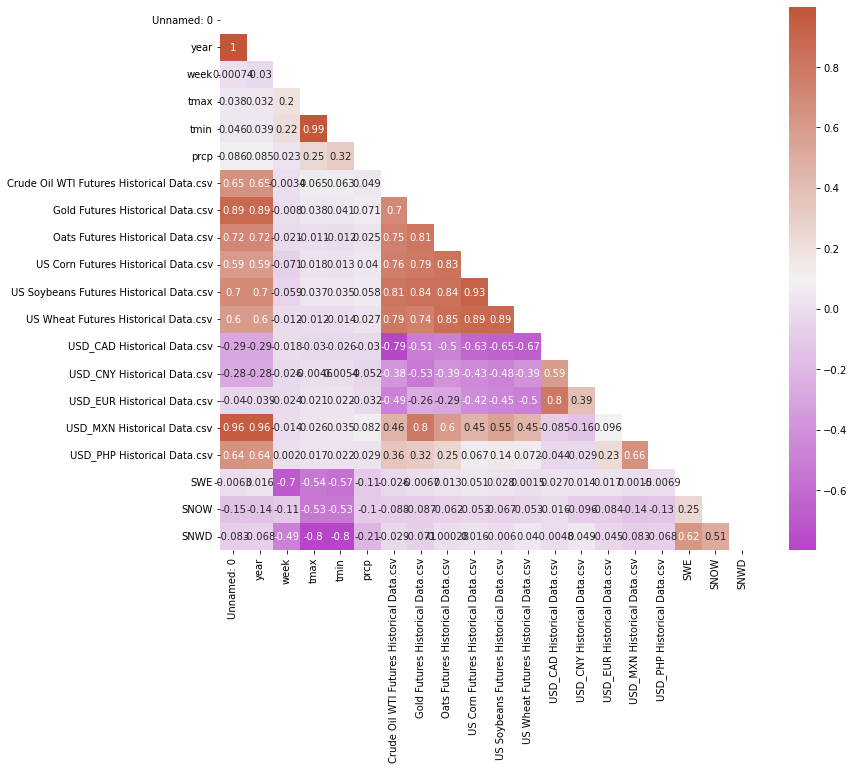

In [86]:
corr = df_w.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(300, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [87]:
corr

,Unnamed: 0,year,week,tmax,tmin,prcp,Crude Oil WTI Futures Historical Data.csv,Gold Futures Historical Data.csv,Oats Futures Historical Data.csv,US Corn Futures Historical Data.csv,US Soybeans Futures Historical Data.csv,US Wheat Futures Historical Data.csv,USD_CAD Historical Data.csv,USD_CNY Historical Data.csv,USD_EUR Historical Data.csv,USD_MXN Historical Data.csv,USD_PHP Historical Data.csv,SWE,SNOW,SNWD
Unnamed: 0,1.000000,0.999526,0.000742,0.037988,0.045654,0.086003,0.648072,0.887917,0.717574,0.592666,0.695189,0.596007,-0.291176,-0.284728,-0.040159,0.959602,0.641913,-0.006288,-0.146369,-0.083293
year,0.999526,1.000000,-0.030045,0.031650,0.038753,0.085250,0.647566,0.887580,0.717737,0.594477,0.696502,0.595924,-0.290339,-0.283679,-0.039401,0.959245,0.640796,0.016188,-0.142768,-0.068316
week,0.000742,-0.030045,1.000000,0.198797,0.216297,0.023150,-0.003394,-0.008026,-0.021131,-0.070807,-0.059238,-0.012160,-0.017579,-0.026150,-0.024409,-0.014176,0.002001,-0.697411,-0.114782,-0.486610
tmax,0.037988,0.031650,0.198797,1.000000,0.991186,0.254551,0.065498,0.038338,-0.010865,0.018389,0.037426,-0.012391,-0.029654,-0.004553,0.020950,0.026015,0.016650,-0.537481,-0.534878,-0.798286
tmin,0.045654,0.038753,0.216297,0.991186,1.000000,0.319657,0.063130,0.041456,-0.012426,0.012983,0.035291,-0.014045,-0.026103,-0.005363,0.021877,0.035296,0.021830,-0.566724,-0.531621,-0.796570
prcp,0.086003,0.085250,0.023150,0.254551,0.319657,1.000000,0.048842,0.071359,0.025325,0.040349,0.058023,0.026570,-0.029524,-0.051971,-0.031565,0.082107,0.029152,-0.111744,-0.101361,-0.214972
Crude Oil WTI Futures Historical Data.csv,0.648072,0.647566,-0.003394,0.065498,0.063130,0.048842,1.000000,0.700073,0.751569,0.764666,0.812062,0.792327,-0.785174,-0.379699,-0.487358,0.461493,0.355837,-0.026472,-0.087548,-0.029496
Gold Futures Historical Data.csv,0.887917,0.887580,-0.008026,0.038338,0.041456,0.071359,0.700073,1.000000,0.806373,0.790129,0.844582,0.742043,-0.510354,-0.530522,-0.262329,0.798751,0.322726,-0.006722,-0.087368,-0.070589
Oats Futures Historical Data.csv,0.717574,0.717737,-0.021131,-0.010865,-0.012426,0.025325,0.751569,0.806373,1.000000,0.829686,0.840374,0.853550,-0.496148,-0.392379,-0.287505,0.597239,0.250070,0.013119,-0.062261,-0.000284
US Corn Futures Historical Data.csv,0.592666,0.594477,-0.070807,0.018389,0.012983,0.040349,0.764666,0.790129,0.829686,1.000000,0.925533,0.893495,-0.629699,-0.433228,-0.420710,0.452842,0.066798,0.050946,-0.052713,0.016088


In [97]:
dates = df_w.year*100+df_w.week
df_w['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

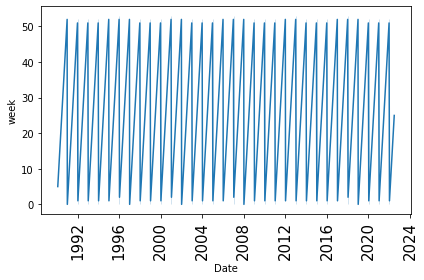

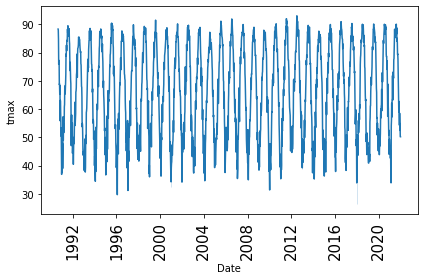

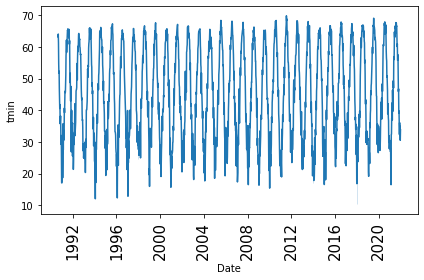

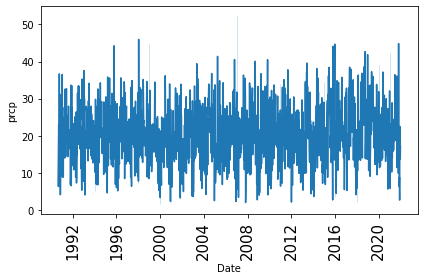

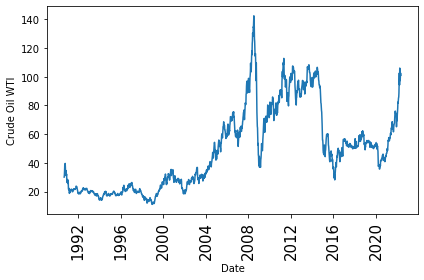

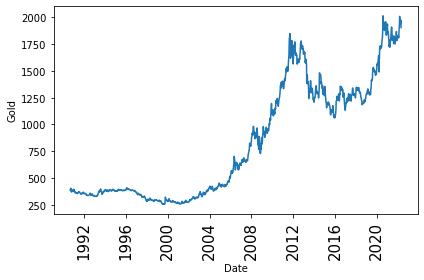

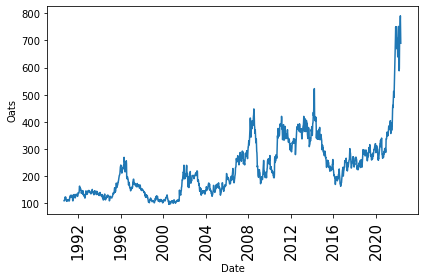

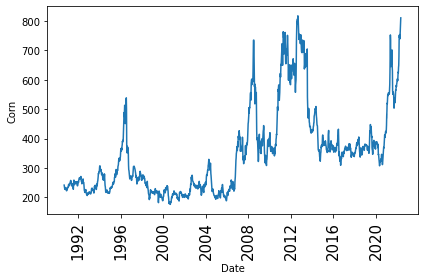

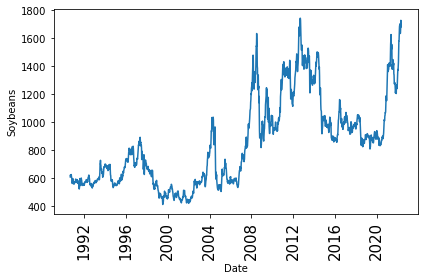

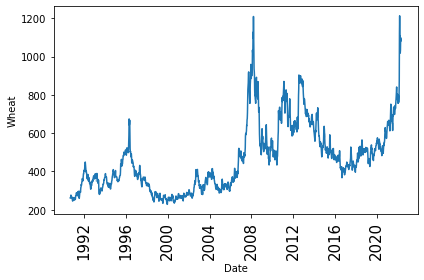

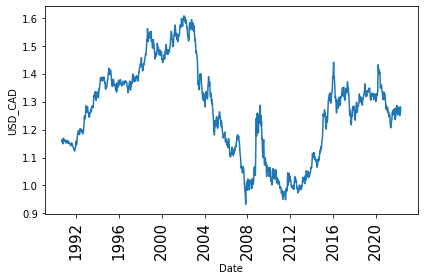

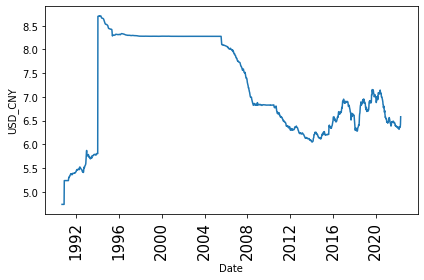

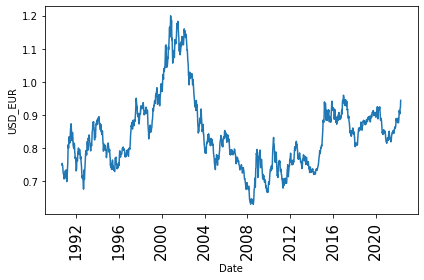

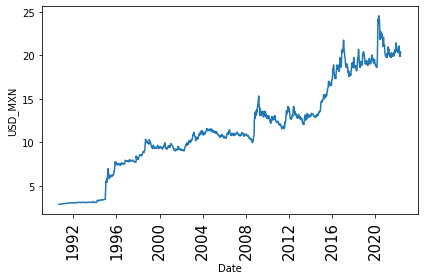

In [100]:
for col_name in df_w.columns.values[2:16]:
    X =df_w.Date
    Y = df_w[col_name]
    # Set figure

    #plt.figure(figsize=(12,10))

    # Seaborn

    sns.lineplot(x=X, y=Y)

    # Setting Ticks

    plt.tick_params(axis='x',labelsize=15,rotation=90)
    plt.tight_layout()

    # Display

    plt.show()

## ACF and PACF analysis




In [9]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [10]:
df_w = df_w.rename(columns={'tmax':'Maximum Temperature','tmin':'Minimum Temperature', 'prcp':'Total Precipitation'})
df_w = df_w.rename(columns={'SNOW':'Snow Fall','SNWD':'Snow Depth'})

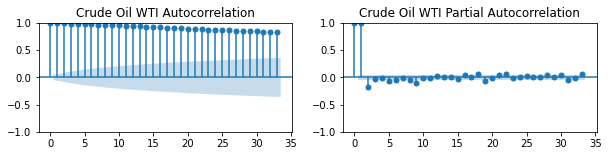

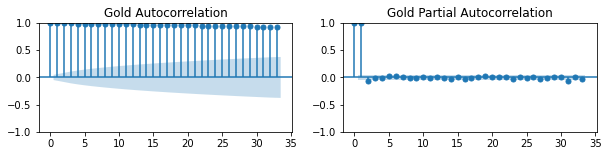

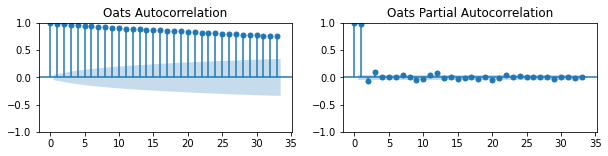

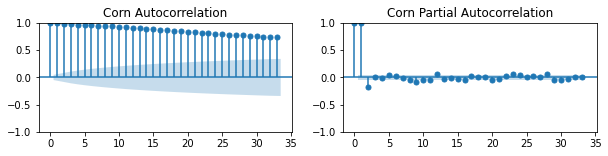

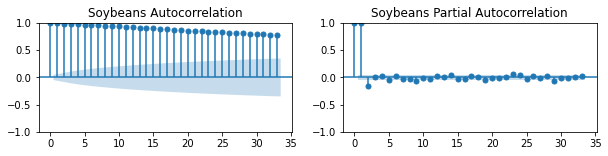

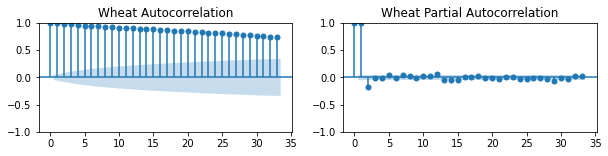

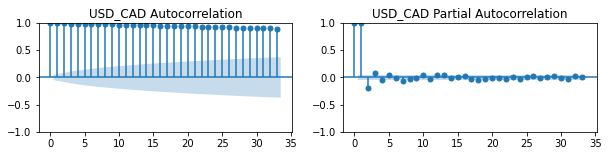

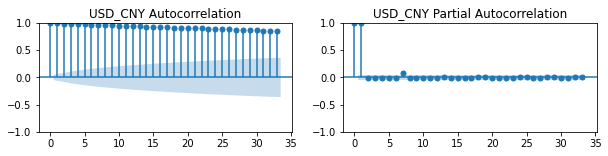

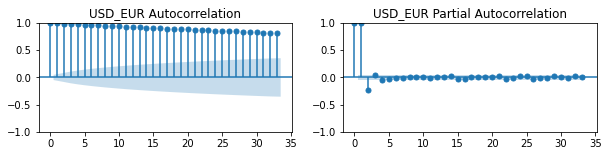

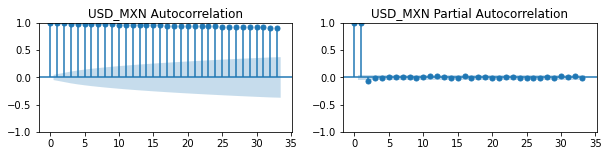

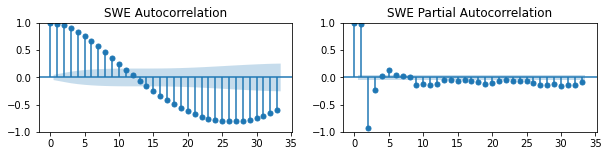

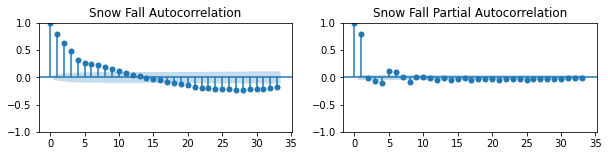

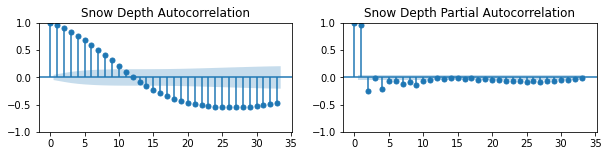

In [10]:
for col_name in df_w.columns.values[5:18]:
    fig, ax = plt.subplots(1,2,figsize=(10,2))
    plot_acf(df_w[col_name], title = col_name + ' Autocorrelation', ax=ax[0])
    plot_pacf(df_w[col_name], method='ywm', title = col_name + ' Partial Autocorrelation', ax=ax[1])
    plt.savefig('Figure/ACF&PACF '+col_name+'.png')
    plt.show()

#### Differenced data ACF and PACF analysis

In [11]:
diff_df=df_w.drop(columns=['Date', 'year', 'week'])
diff_df = diff_df.diff()
diff_df = diff_df.iloc[1:]

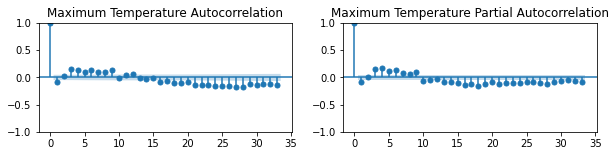

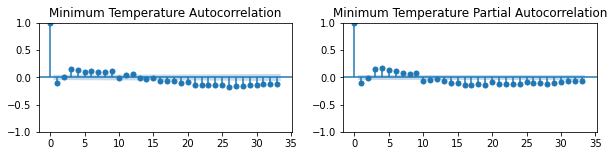

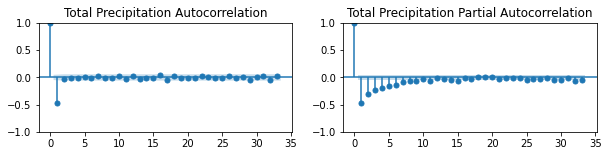

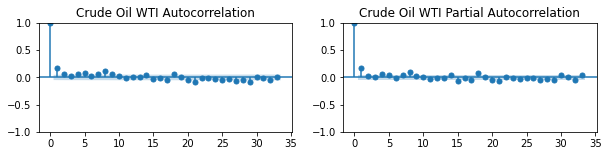

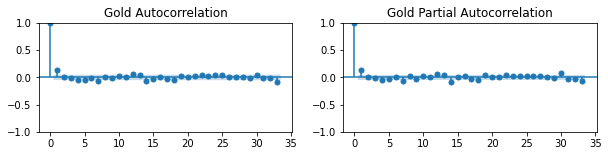

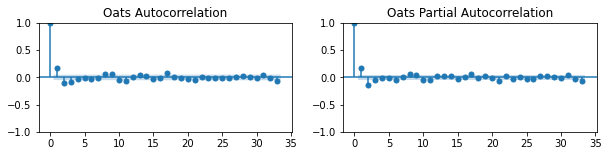

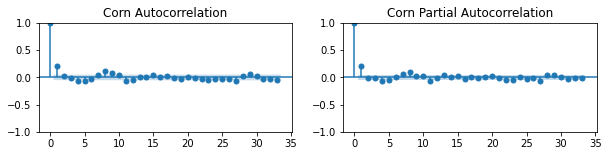

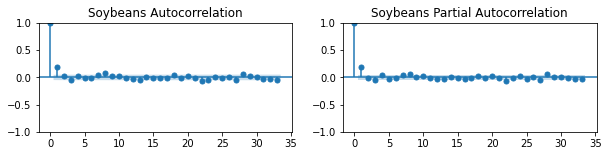

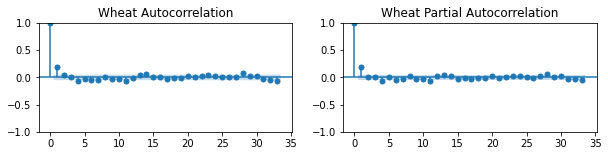

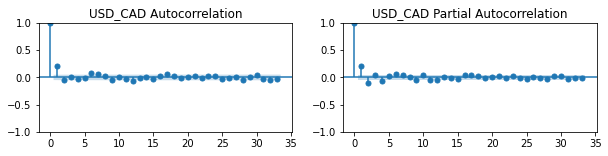

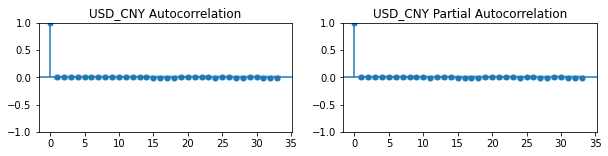

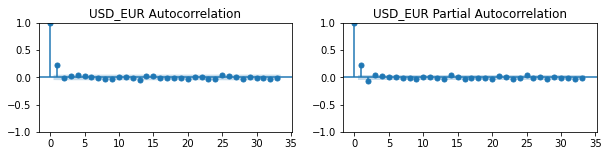

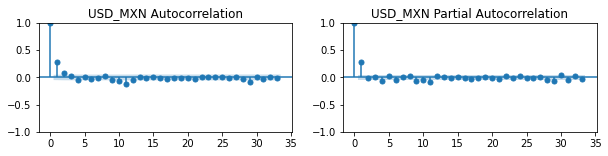

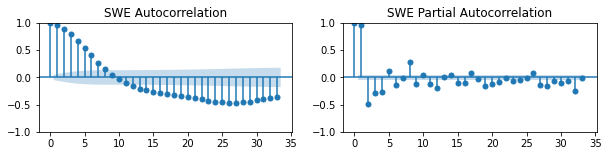

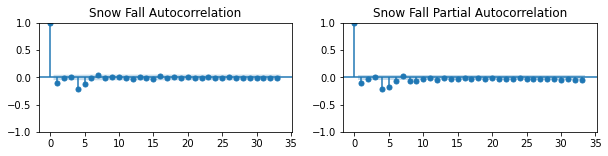

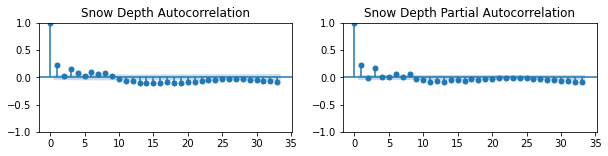

In [14]:
for col_name in diff_df.columns.values:
    fig, ax = plt.subplots(1,2,figsize=(10,2))
    plot_acf(diff_df[col_name], title = col_name + ' Autocorrelation', ax=ax[0])
    plot_pacf(diff_df[col_name], method='ywm', title = col_name + ' Partial Autocorrelation', ax=ax[1])
    plt.savefig('Figure/diff_ACF&PACF '+col_name+'.png')
    plt.show()

### ADF

In [16]:
from statsmodels.tsa.stattools import adfuller

for col_name in df_w.columns.values[2:18]:
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_w[col_name].values)
    #print (col_name)
    #print(adf )
    print( pval )

7.827409191835257e-29
4.788478971132517e-29
3.511684509587217e-20
0.27487843732410533
0.970132850660252
0.6988633348138931
0.15478781306264483
0.21521851410958587
0.1649688757978413
0.5135310307196392
0.1378577308059234
0.17495937668724965
0.8328958676686312
3.803191955726646e-30
7.739093683649647e-20
1.02625719806391e-23


In [10]:
diff_df_w=df_w.drop(columns=['Date'])

In [11]:
diff_df_w = diff_df_w.diff()
diff_df_w = diff_df_w.iloc[1:]

In [16]:
diff_df_w['year']=df_w.year[1:]
diff_df_w['week']=df_w.week[1:]

In [17]:
diff_df_w.to_csv('Data/dataset.csv')

In [18]:
diff_df_w

,year,week,tmax,tmin,prcp,Crude Oil WTI Futures Historical Data.csv,Gold Futures Historical Data.csv,Oats Futures Historical Data.csv,US Corn Futures Historical Data.csv,US Soybeans Futures Historical Data.csv,US Wheat Futures Historical Data.csv,USD_CAD Historical Data.csv,USD_CNY Historical Data.csv,USD_EUR Historical Data.csv,USD_MXN Historical Data.csv,SWE,SNOW,SNWD
36,1990,41,0.231719,-2.491029,-17.361429,-2.800000,-20.660000,0.0500,-5.40,-14.700,-11.00,0.01622,0.00000,-0.00740,0.00600,40.771429,97.000000,1.537537
37,1990,42,-3.653096,-3.812763,1.347143,-5.612000,2.880000,1.6500,2.70,-4.900,0.15,0.00418,0.00000,0.00004,0.00800,74.728571,-488.571429,0.181753
38,1990,43,2.996899,1.217759,-13.064286,3.506000,5.940000,-2.5000,-0.90,-14.950,-0.50,-0.00392,0.00000,0.00008,0.00200,139.442857,11478.000000,1.356229
39,1990,44,-12.418266,-6.051888,23.538571,-0.860000,6.760000,-0.5500,1.30,-14.450,3.10,-0.00002,0.00000,-0.01114,0.00200,254.800000,15332.571429,6.229240
40,1990,45,7.199344,1.608928,-27.015714,-2.454000,-4.120000,-9.0000,-4.65,-15.000,-9.90,-0.00130,0.00000,-0.00472,0.00400,331.885714,-609.571429,-0.468038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2021,34,2.259412,0.171195,-5.414286,2.316000,17.760000,14.5000,-5.80,-3.250,-16.25,-0.00746,-0.01200,-0.00356,0.16694,0.000000,-7.285714,0.000000
1674,2021,35,-4.788346,-3.675091,11.850000,1.814000,14.000000,-8.3000,-26.10,-52.050,-11.55,-0.00446,-0.01714,-0.00548,-0.24268,0.000000,0.000000,0.000000
1675,2021,36,1.073948,-2.842894,-24.675714,0.926667,-13.903333,-13.5625,-19.40,-15.624,-9.50,0.00632,-0.00328,0.00050,-0.09716,0.000000,0.000000,0.000000
1676,2021,37,-1.637910,0.823106,12.104286,0.731333,-23.576667,35.9125,14.60,11.624,1.20,0.00400,-0.00672,0.00346,0.00142,0.000000,0.000000,0.000000


In [25]:
for col_name in diff_df_w.columns.values[2:18]:
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(diff_df_w[col_name].values)
    #print(col_name)
    #print(adf)
    print( pval )

4.204705243083773e-30
2.056679282889376e-30
9.494998115830427e-29
3.4111780608561195e-15
7.300018886488504e-20
5.108682789233518e-14
3.673173229146828e-21
1.452473058325993e-23
1.1503489934438167e-21
3.1707948200238753e-22
0.0
0.0
2.2915849920894843e-26
1.9954309132471404e-20
2.534339565285786e-19
3.6461248088133407e-23
